In [1165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from scipy.integrate import odeint
from scipy.optimize import least_squares
from scipy import optimize
from datetime import date, timedelta
import random
import math


In [1166]:
Psi = pd.read_csv('dados/Psi.csv')

Dados2 = pd.read_csv ('dados/Dados_novos_BAHIA.csv')
vacinados_dados = Dados2['Vacinados'].fillna(10)

In [1167]:
npd = len(Psi)

Nfo = 8
Psi = Psi.values
Psif = [[0]]*npd

for k in range(1, npd):
    if (k-Nfo) < 0 :
        Psif[k] = 1/k*sum(Psi[0:k])
    else:
        Psif[k] = 1/Nfo*sum(Psi[k-Nfo:k])

Psif.pop(0)


[0]

In [1168]:
vacinados_dados_aux = np.copy(vacinados_dados)
for i in range(1,len(vacinados_dados_aux)):
    diff = vacinados_dados_aux[i] - vacinados_dados_aux[i-1]
    if diff < 0:
        vacinados_dados_aux[i-1] = vacinados_dados_aux[i]

novos_vacinados = np.diff(vacinados_dados_aux)

# novos_vacinados_at=np.zeros(1+len(novos_vacinados))
# for i in range(len(novos_vacinados)):
#     novos_vacinados_at[1+i]=novos_vacinados[i]
# novos_vacinados=novos_vacinados_at


# for i in range(15):
#     novos_vacinados.insert(0, 0)
# for i in range(15):
#     novos_vacinados.pop(-1)
Dados = pd.read_csv ('dados/estado.csv')

df_all = Dados.query("date >= '2021-01-01'")

#Read the file
dates=df_all.date.values
data_mortes=df_all.deaths.values
data_casos = df_all.cases.values
data = df_all.deaths.values
data = np.delete(data,-1)

len(novos_vacinados)


333

In [1169]:
print(vacinados_dados[1])

10.0


In [1170]:

ts0 = np.arange(len(np.cumsum(novos_vacinados)))
a = np.polyfit(ts0,np.cumsum(novos_vacinados),50)
tau=np.poly1d(a)

/Users/filipecruz/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [1171]:


def SIR(y,t, args):

    k = 1/4
    gamma_a = 1/3.5
    gamma_s = 1/4
    gamma_h = 0.18
    gamma_u = 0.13342706158133355
    mi_u = 0.4
    qsi = 0.53
    h = 0.06
    h_v = 0
    mi_h = 0.15
    ome_h = 0.14
    ome_u = 0.29
    delta = 0.31
    p = 0.2
    
    beta0, beta1, beta2,beta3, t1, t2,t3 = args

    if t<t1:
        beta=beta0    
    elif (t>=t1):
        beta=beta1
    elif (t>=t2):
        beta=beta2
    elif t>=t3:
        beta=beta3

    # beta_v = beta*0.5
    beta_v = beta/2
    

    delta_av = 0.31
    delta_sv = 0.31
    phi_e = 1/14
    k_v=1/3
    p_v = 0.1
    gamma_av = 1/3.5
    gamma_sv = 1/4
    gamma_vu=0.26
    qsi_v = 0.99
    eps=2
    mi_vh=0.03
    mi_vu=0.25
    gamma_vh=0.08

    tau = 3200

    N=14873064#############
    #N=1#########
    psi= 0.5# Psif[int(t)]
    S=y[0]
    E=y[1]
    V=y[2]
    Sv=y[3]
    Ev=y[4]
    Ia=y[5]
    Is=y[6]
    Iav=y[7]
    Isv=y[8]
    H=y[9]
    Hv=y[10]
    U=y[11]
    Uv=y[12]
    R=y[13]
    Rv=y[14]
    D=y[15]
    Nw=y[16]
    NwV=y[17]

    dSdt = (-(1-psi)*beta*S*(Is+delta*Ia+delta_av*Iav+delta_sv*Isv)) - tau/N
    dEdt = ((1-psi)*beta*S*(Is+delta*Ia+delta_av*Iav+delta_sv*Isv)) - k*E
    dVdt = tau/N - phi_e*V - ((1-psi)*beta*V*(Is+delta*Ia+delta_av*Iav+delta_sv*Isv))
    dSvdt =  phi_e*(1-eps)*V - ((1-psi)*beta_v*Sv*(Is+delta*Ia+delta_av*Iav+delta_sv*Isv)) #- phi_e*eps*Sv
    dEvdt = ((1-psi)*beta_v*Sv*(Is+delta*Ia+delta_av*Iav+delta_sv*Isv)) - k_v*Ev
    dIadt = (1-p)*k*E - gamma_a*Ia
    dIsdt = p*k*E - gamma_s*Is
    dIavdt = (1-p_v)*k_v*Ev - gamma_av*Iav
    dIsvdt = p_v*k_v*Ev - gamma_sv*Isv   
    dHdt = h*qsi*gamma_s*Is + (1-mi_u+ome_u*mi_u)*gamma_u*U - gamma_h*H   
    dHvdt = h_v*qsi_v*gamma_sv*Isv + (1-mi_vu+ome_u*mi_vu)*gamma_vu*Uv - gamma_vh*Hv    
    dUdt = h*(1-qsi)*gamma_s*Is + ome_h*gamma_h*H - gamma_u*U
    dUvdt = h_v*(1-qsi_v)*gamma_sv*Isv + ome_h*gamma_vh*Hv - gamma_u*Uv
    dRdt = gamma_a*Ia + (1-h)*gamma_s*Is + (1-mi_h)*(1-ome_h)*gamma_h*H
    dRvdt = gamma_av*Iav + (1-h_v)*gamma_sv*Isv + (1-mi_vh)*(1-ome_h)*(gamma_vh*Hv) + phi_e*eps*V
    dDdt = (1-ome_h)*(mi_h*gamma_h*H +mi_vh*gamma_vh*Hv) + (1-ome_u)*(mi_u*gamma_u*U+mi_vu*gamma_vu*Uv)
    dNwdt = p*k*E + p_v*k_v*Ev
    dNwVdt = tau/N
        
    return [dSdt, dEdt, dVdt, dSvdt, dEvdt, dIadt, dIsdt, dIavdt, dIsvdt, dHdt, dHvdt, dUdt, dUvdt, dRdt, 
            dRvdt, dDdt, dNwdt, dNwVdt]


In [1172]:
def Best_Fit(data,n_tries, ts0, q0):

    # 4 betas 4 tempos
    #  tempos [0, 100], []

    # #DEEFINE THE INTERVALS OF PARS[0, 2.],[0, 2.], [0, 5.], [0, 5.],[0, 5.],[0, 80], [80, 170], [170, 240], [240, 400]
    intervals = np.array([[0, 5.],[0, 5.], [0, 5.], [0, 5.], [0, 160], [160, 200], [200, 300]])

    #NUMBER OF FITS
    #best error starts at inft 
    best_err = np.inf
    #aj the number of best fists 
    aj = 0
    for i in range(n_tries):
        if i%5 == 0:
            print(i)
            
        #create a set of parameters in the interval
        par0 = np.random.rand(len(intervals))
        par0 = intervals[:,0] + par0 * (intervals[:,1] - intervals[:,0])
        try:
            res = least_squares(lambda pars: lq_SIR(pars,data, ts0, q0), par0, bounds=(intervals[:,0], \
                                                intervals[:,1]))
            ier = res.status
            #if converges
            if ier >= 1 and ier <= 4:
                if res.cost < best_err:
                    #best_err = erro
                    best_err = res.cost
                    #best_pop = parametro
                    best_pop = res.x
                    #+1 best fit
                    aj = aj +1
                    print('achou',aj)
        except:
            pass
                #in does not converge, do nothing
    

    return best_pop

In [1173]:
def lq_SIR(pars, data, ts0, q0):
    beta0, beta1, beta2,beta3, t1, t2, t3 = pars
    #parameters
    parode = beta0, beta1, beta2,beta3, t1, t2,t3
    #calls integrator

    qs = odeint(SIR, q0, ts0, args=(parode,),mxstep=1000000)
    mortos = qs[:,-3]*14930634
    #define the standardized residuals

    errMortos = (mortos - data) / np.sqrt(mortos+1)
    return np.r_[errMortos]

In [1174]:
N=14873064


#initial conditions

q0 = [
    0.8002151436282163 ,
    0.0023662791892471815,
    0,
    0,
    0,
    0.0015491725384642486,
    0.0004385474858925033,
    0,
    0,
    3.0058880370174367e-05,
    0.0,
    2.5542546092586197e-05,
    0.0,
    0.15650499264821266,
    0,
    9159/N,
    0.03581418879497971,
    0
]

#Run the minimizer
n_tries=600  #Quanto maior mais certeza do resultado. Colocar em 100 para roda com mais certeza (Ou até maiws se for necessário)
# ts0 = np.arange(len(novos_vacinados))

# best_pop=Best_Fit(data,n_tries, ts0, q0)

# beta0, beta1, beta2, beta3, t1, t2, t3 = best_pop

#Create an x axixis for plotting the function.
#parameters
parode = [  1.80760448,   2.04260806,   0.55305857,   0.61962407,
       119.06788216, 199.06391995, 226.28664906]
#calls integrator

qs = odeint(SIR,q0, ts0,args=(parode,),mxstep=1000000)

0.0

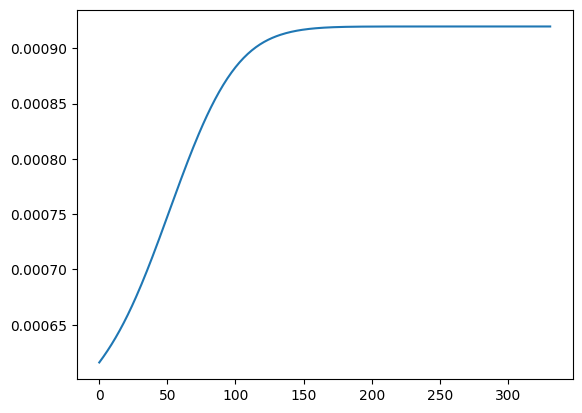

In [1175]:
len(novos_vacinados)-len(data)

ts0 = np.arange(len(novos_vacinados)-1)
qs = odeint(SIR,q0, ts0,args=(parode,),mxstep=1000000)
# ts0=np.arange(len(data))
pl.plot(ts0,qs[:,-3])
len(ts0)-len(novos_vacinados)
novos_vacinados[len(ts0)]

In [1176]:
len(np.diff(data_mortes))

333

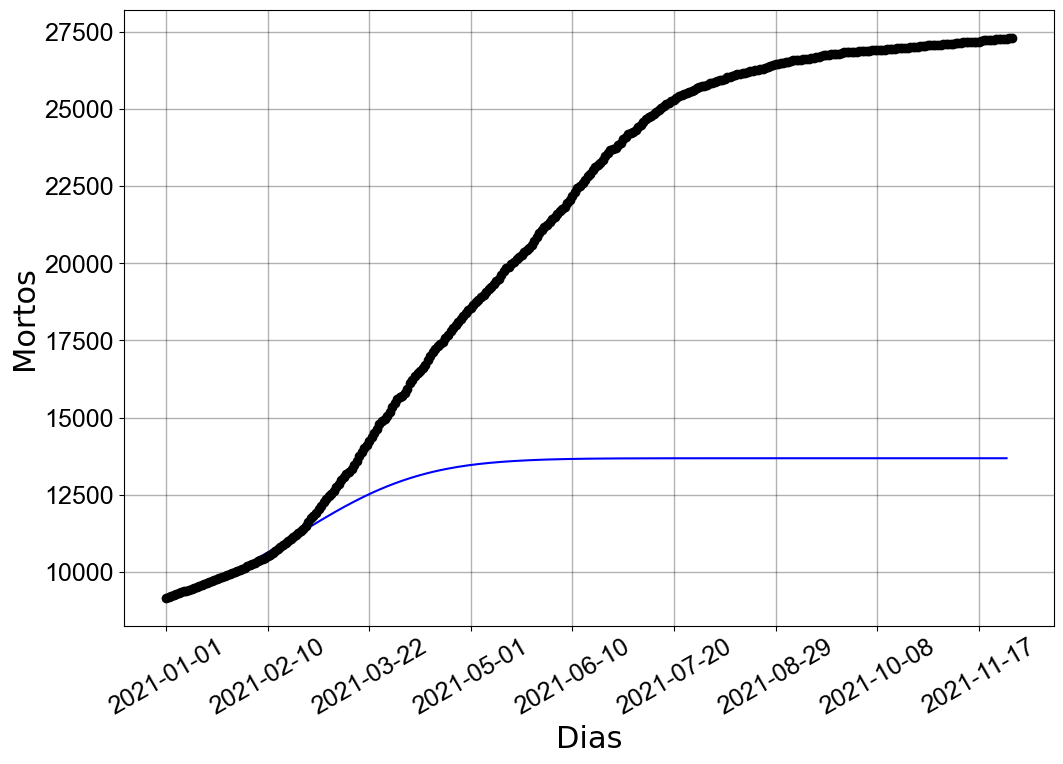

In [1177]:

#Save Fig
#fig.savefig(r"Fits\\"+s+file+".png",bbox_inches='tight')

qi = qs[:,-3] #Casos acumulados

#Plotting
#Create the figure and the graph.
fig, ax = pl.subplots(figsize=(12,8))

#Create a grid for visualization.
ax.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)
#Plot the points(Scatters). s=size, zorder= priority->(puttin g the points in at the front of everything).
ax.scatter(dates[:334], (data_mortes),color='black',zorder=3,label='Reported data')

#Plot the fitted function as a line.
ax.plot(dates[:332], N*qi,color='blue',label='Fitted function')
ax.autoscale()

#Set the labels
ax.set_ylabel('Mortos',fontsize=22)
ax.set_xlabel('Dias', fontsize=22)
#Set the title
#The size of the numbers on the axixis
ax.tick_params(labelsize=18)

#Limiting the ammount of dates on the X axixs
ax.xaxis.set_major_locator(pl.MaxNLocator(10))
#Rotating the dates for better visualization
pl.setp(ax.get_xticklabels(), rotation=30)


#Setting the font of the numbers on the axixis as ARIAL 
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")  

#Show Graph       
pl.show()


In [1178]:
best_pop    

array([  2.01773227,   4.9589483 ,   2.79653478,   2.63455816,
        91.57488201, 179.92992251, 235.36865324])

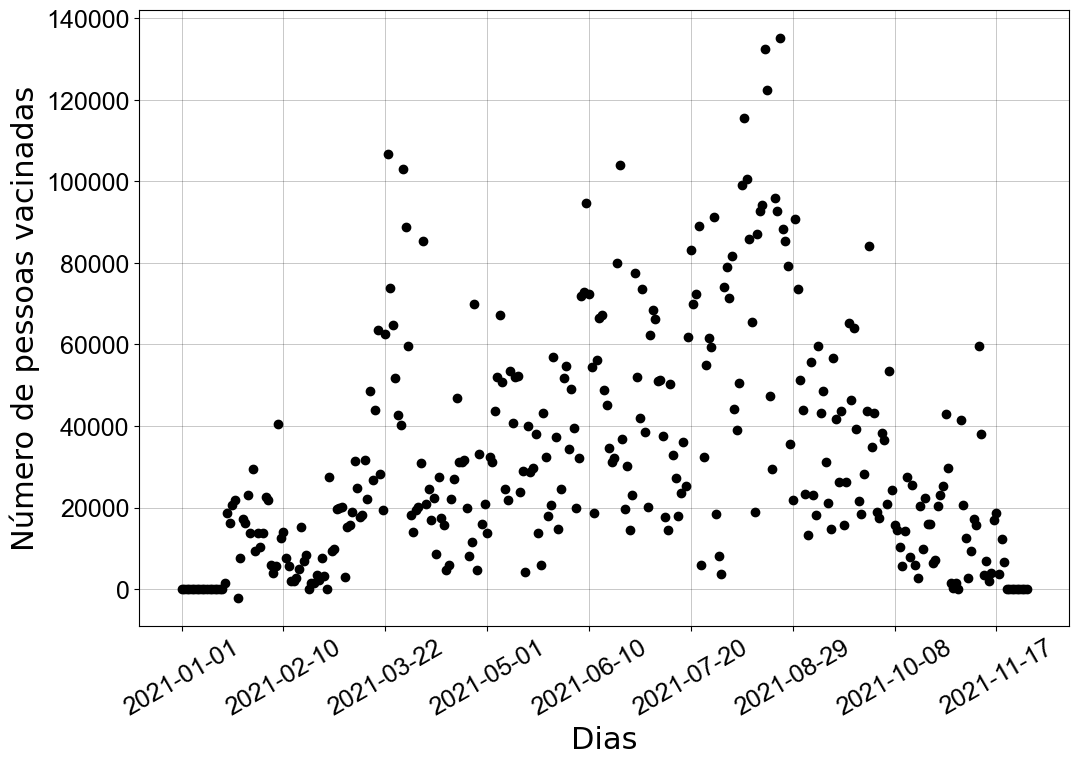

In [1179]:

#Save Fig
#fig.savefig(r"Fits\\"+s+file+".png",bbox_inches='tight')

qi = qs[:,-1] #Casos acumulados

#Plotting
#Create the figure and the graph.
fig, ax = pl.subplots(figsize=(12,8))

#Create a grid for visualization.
ax.grid(which='major', axis='both', color='black',linewidth=.5,alpha=0.3)
#Plot the points(Scatters). s=size, zorder= priority->(puttin g the points in at the front of everything).
ax.scatter(dates[:len(vacinados_dados)-1], np.diff((vacinados_dados)),color='black',zorder=3,label='Reported data')

#Plot the fitted function as a line.
ax.autoscale()

#Set the labels
ax.set_ylabel('Número de pessoas vacinadas',fontsize=22)
ax.set_xlabel('Dias', fontsize=22)

#Set the title
#The size of the numbers on the axixis
ax.tick_params(labelsize=18)

#Limiting the ammount of dates on the X axixs
ax.xaxis.set_major_locator(pl.MaxNLocator(10))
#Rotating the dates for better visualization
pl.setp(ax.get_xticklabels(), rotation=30)


#Setting the font of the numbers on the axixis as ARIAL 
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")  

#Show Graph       
pl.show()
